In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import backend as K
from sklearn.model_selection import train_test_split

<h4>Data Loading - 10 dimensional vectors

In [2]:
rawdata=np.loadtxt('semeion.data');
x=rawdata[:,0:256].copy();
del(rawdata);
x_train,_,x_test,_=train_test_split(x,x,test_size=0.33)

<h4>Model Definition

In [3]:
#Model definition
autoencoder=tf.keras.models.Sequential()
autoencoder.add(tf.keras.layers.Dense(2, input_dim=256, activation='sigmoid'))
autoencoder.add(tf.keras.layers.Dense(256, activation='softmax'))

#Model compilation
autoencoder.compile(loss='mse',optimizer='adam',metrics=['mse','mae'])

#Fitting the model on the dataset (set verbose=2 if you want to see the training progress)
history=autoencoder.fit(x_train,x_train,validation_data=(x_test,x_test),shuffle=True,epochs=100,batch_size=10,verbose=0)

<h4>Getting output of the hidden layer

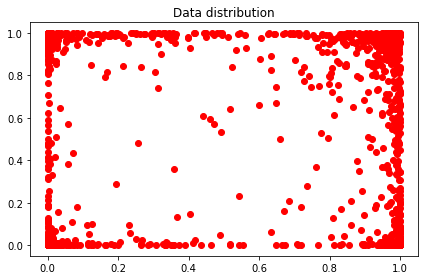

In [4]:
get_first_hidden_layer_output=K.function(inputs=autoencoder.layers[0].input, outputs=autoencoder.layers[0].output)
layer_output=get_first_hidden_layer_output(x)

fig,ax=plt.subplots()
ax.scatter(layer_output[:,0], layer_output[:,1],c='red')
ax.set_title('Data distribution')
fig.tight_layout()
plt.show()